# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import scipy
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing csv file
df = pd.read_csv(r'C:\Users\iNDIA\Desktop\Kaggle\QS World University Rankings 2017 - 2022\qs-world-university-rankings-2017-to-2022-V2.csv')

In [3]:
df.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [4]:
df.shape

(6482, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [6]:
#Changing dtype
df['year'] = df['year'].astype('int16')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int16  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

# 2. Wrangling

In [8]:
# Dropping column 'logo' from the table
df = df.drop(columns = ['link'])

In [9]:
df.head()

,university,year,rank_display,score,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [10]:
df.value_counts()

university                        year  rank_display  score  country         city         region  logo                                                                                                                   type    research_output  student_faculty_ratio  international_students  size  faculty_count
 University of Dundee             2017  244           41.6   United Kingdom  Dundee       Europe  https://www.topuniversities.com/sites/default/files/-university-of-dundee_592560cf2aeae70239af4b2c_small.jpg           Public  High             14.0                   3,025                   L     953              1
University of Antwerp             2019  223           40.9   Belgium         Antwerp      Europe  https://www.topuniversities.com/sites/default/files/university-of-antwerp_21_small.jpg                                 Public  Very High        9.0                    2,688                   L     1,704            1
University of Amsterdam           2017  57            74.3   Ne

In [11]:
#checking missing values

df.isnull().sum()

university                   0
year                         0
rank_display                68
score                     3662
country                      0
city                       178
region                       0
logo                         0
type                        12
research_output              2
student_faculty_ratio       75
international_students     164
size                         2
faculty_count               78
dtype: int64

In [12]:
# calculating missing percent

missing_percent = round(df.isnull().mean() * 100, 1)

pd.DataFrame(missing_percent[missing_percent > 0], columns = ['% of missing values'])

,% of missing values
rank_display,1.0
score,56.5
city,2.7
type,0.2
student_faculty_ratio,1.2
international_students,2.5
faculty_count,1.2


In [13]:
# Subsetting and checking colleges in "India"

df_india = df.loc[df['country'].isin(["India"])]

In [14]:
df_india

,university,year,rank_display,score,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
152,Indian Institute of Science,2017,152,53.8,India,Bangalore,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,9.0,5,S,446
186,Indian Institute of Technology Delhi (IITD),2017,185,48.6,India,New Delhi,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,11.0,100,M,843
218,Indian Institute of Technology Bombay (IITB),2017,219,44.6,India,Mumbai,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,11.0,116,M,"1,015"
248,Indian Institute of Technology Madras (IITM),2017,249,41.0,India,Chennai,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,11.0,94,M,884
303,Indian Institute of Technology Kanpur (IITK),2017,302,36.7,India,Kanpur,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,13.0,29,M,551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6256,Panjab University,2022,1001-1200,NaN,India,Chandigarh,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,17.0,43,L,"1,048"
6281,Thapar Institute of Engineering & Technology,2022,1001-1200,NaN,India,Patiala,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,17.0,134,M,509
6348,University of Mumbai,2022,1001-1200,NaN,India,Mumbai,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,8.0,NaN,S,NaN
6378,Vellore Institute of Technology (VIT),2022,1001-1200,NaN,India,Vellore,Asia,https://www.topuniversities.com/sites/default/...,Private,Very High,17.0,848,XL,"2,072"


In [15]:
# Removing rows which have more than 4 null values

print(len(df[df.isnull().sum(axis =1) > 4]))

22


In [16]:
drop_index = df[df.isnull().sum(axis =1) > 4].index.tolist()

In [17]:
df.drop(drop_index, inplace = True)

In [18]:
print(len(df[df.isnull().sum(axis =1) > 4]))

0


In [19]:
# Dropping rows with more than 4 null values

drop_index = df[df.isnull().sum(axis =1) > 4]. index.tolist()

df.drop(drop_index, inplace = True)

print('Rows with more than 4 nulll values have been dropped!')

Rows with more than 4 nulll values have been dropped!


In [20]:
print(len(df[df.isnull().sum(axis = 1) > 4]))

0


No rows with more than 4 null values now

In [21]:
# Since 'score' has more than 50% of data as null, we will be dropping that column as well

df.drop(['score'], axis = 1, inplace = True)

In [22]:
df.head()

,university,year,rank_display,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [23]:
# Converting 'international_students', 'faculty_count', 'rank_display'
# column to numerical by removing all special characters from them - i.e we have converted string to float here!!

df['research_output'] = df['research_output'].replace('Very high', 'Very High')
df['international_students'].apply(lambda x: float(str(x).replace(',', '')))
df['faculty_count'] = df['faculty_count'].apply(lambda x: float(str(x).replace (',', '')))


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6460 entries, 0 to 6481
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6460 non-null   object 
 1   year                    6460 non-null   int16  
 2   rank_display            6411 non-null   object 
 3   country                 6460 non-null   object 
 4   city                    6287 non-null   object 
 5   region                  6460 non-null   object 
 6   logo                    6460 non-null   object 
 7   type                    6450 non-null   object 
 8   research_output         6460 non-null   object 
 9   student_faculty_ratio   6407 non-null   float64
 10  international_students  6318 non-null   object 
 11  size                    6460 non-null   object 
 12  faculty_count           6404 non-null   float64
dtypes: float64(2), int16(1), object(10)
memory usage: 926.8+ KB


## Visualizing Universities

### Universities by Year and Type

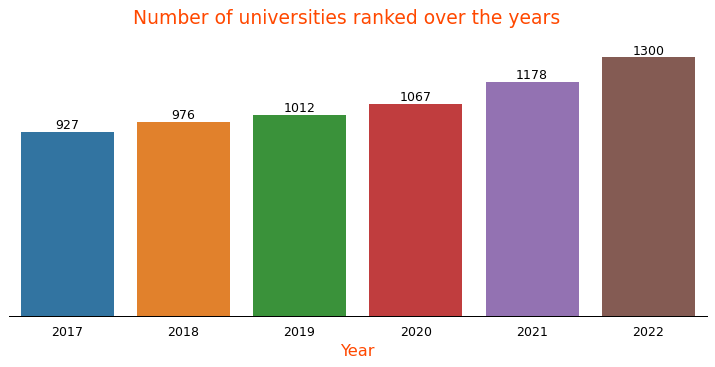

In [25]:
year_df = df['year'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,4), dpi=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=df, x='year');

# add values on top of each bar
ax.bar_label(ax.containers[0])

ax.set_xlabel('Year', fontsize=13, color = '#ff4800');
fig.suptitle('Number of universities ranked over the years', fontsize=15, color = '#ff4800');

The year 2022 witnessed a rise in the ranking of the universities

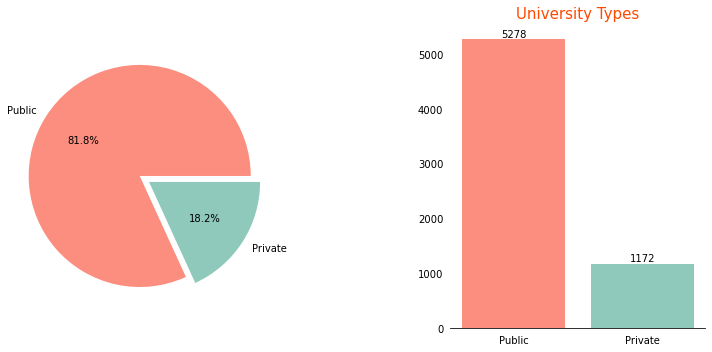

In [26]:
type_df = df['type'].value_counts()
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(10,5))

pie_bar_colors = ['#FB8E7E', '#8EC9BB']
explode = [0,0.1]

ax1.pie(df['type'].value_counts().values, labels = df['type'].value_counts().index,
       explode = explode, colors = pie_bar_colors, autopct = '%1.1f%%')
ax1.axis('equal')

ax2.bar(df['type'].value_counts().index, df['type'].value_counts().values, color = pie_bar_colors)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='both', which = 'both', labelsize = 10,
               left = False, bottom = False)
plt.title('University Types', fontsize = 15, color = '#ff4800');

ax2.bar_label(ax2.containers[0])

fig.tight_layout()
fig.subplots_adjust(wspace = 0.7)

Approximately 82% of the top universities are public

### Distribution of Universities across the World Regions

Text(0.5, 0.98, 'Distribution of universities across regions')

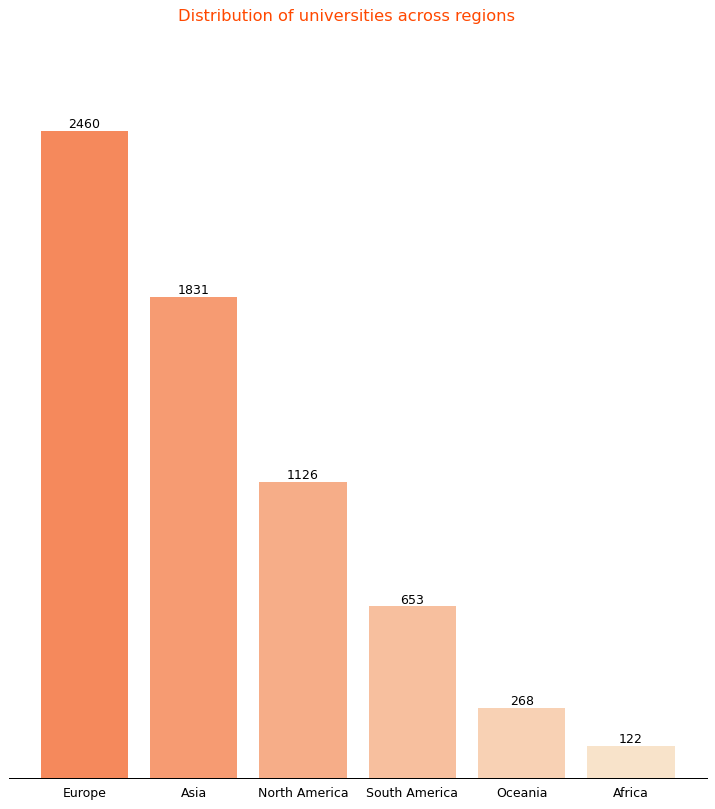

In [27]:
df['region'] = df['region'].apply(lambda x: x.replace('Latin America', 'South America'))

region_sum = pd.DataFrame(df['region'].value_counts().reset_index())

# define colors
colors = ['#f8e3ca','#f8d1b4','#f7bf9e','#f6ad88','#f69b72','#f5895c']
cmap = ListedColormap(colors)

fig, ax1 = plt.subplots(figsize=(10, 10), dpi=90)

# Create Barplot
ax1.bar(region_sum['index'], region_sum['region'], color = colors[::-1])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(bottom = False)
ax1.get_yaxis().set_visible(False)

ax1.bar_label(ax1.containers[0])

fig.suptitle('Distribution of universities across regions', fontsize = 13, color = '#ff4800')



Europe has the maximum number of top ranked colleges followed by Asia and North America

### Universities by Countries

In [28]:
print('Number of countries with ranked universities:', df['country'].nunique())

Number of countries with ranked universities: 97


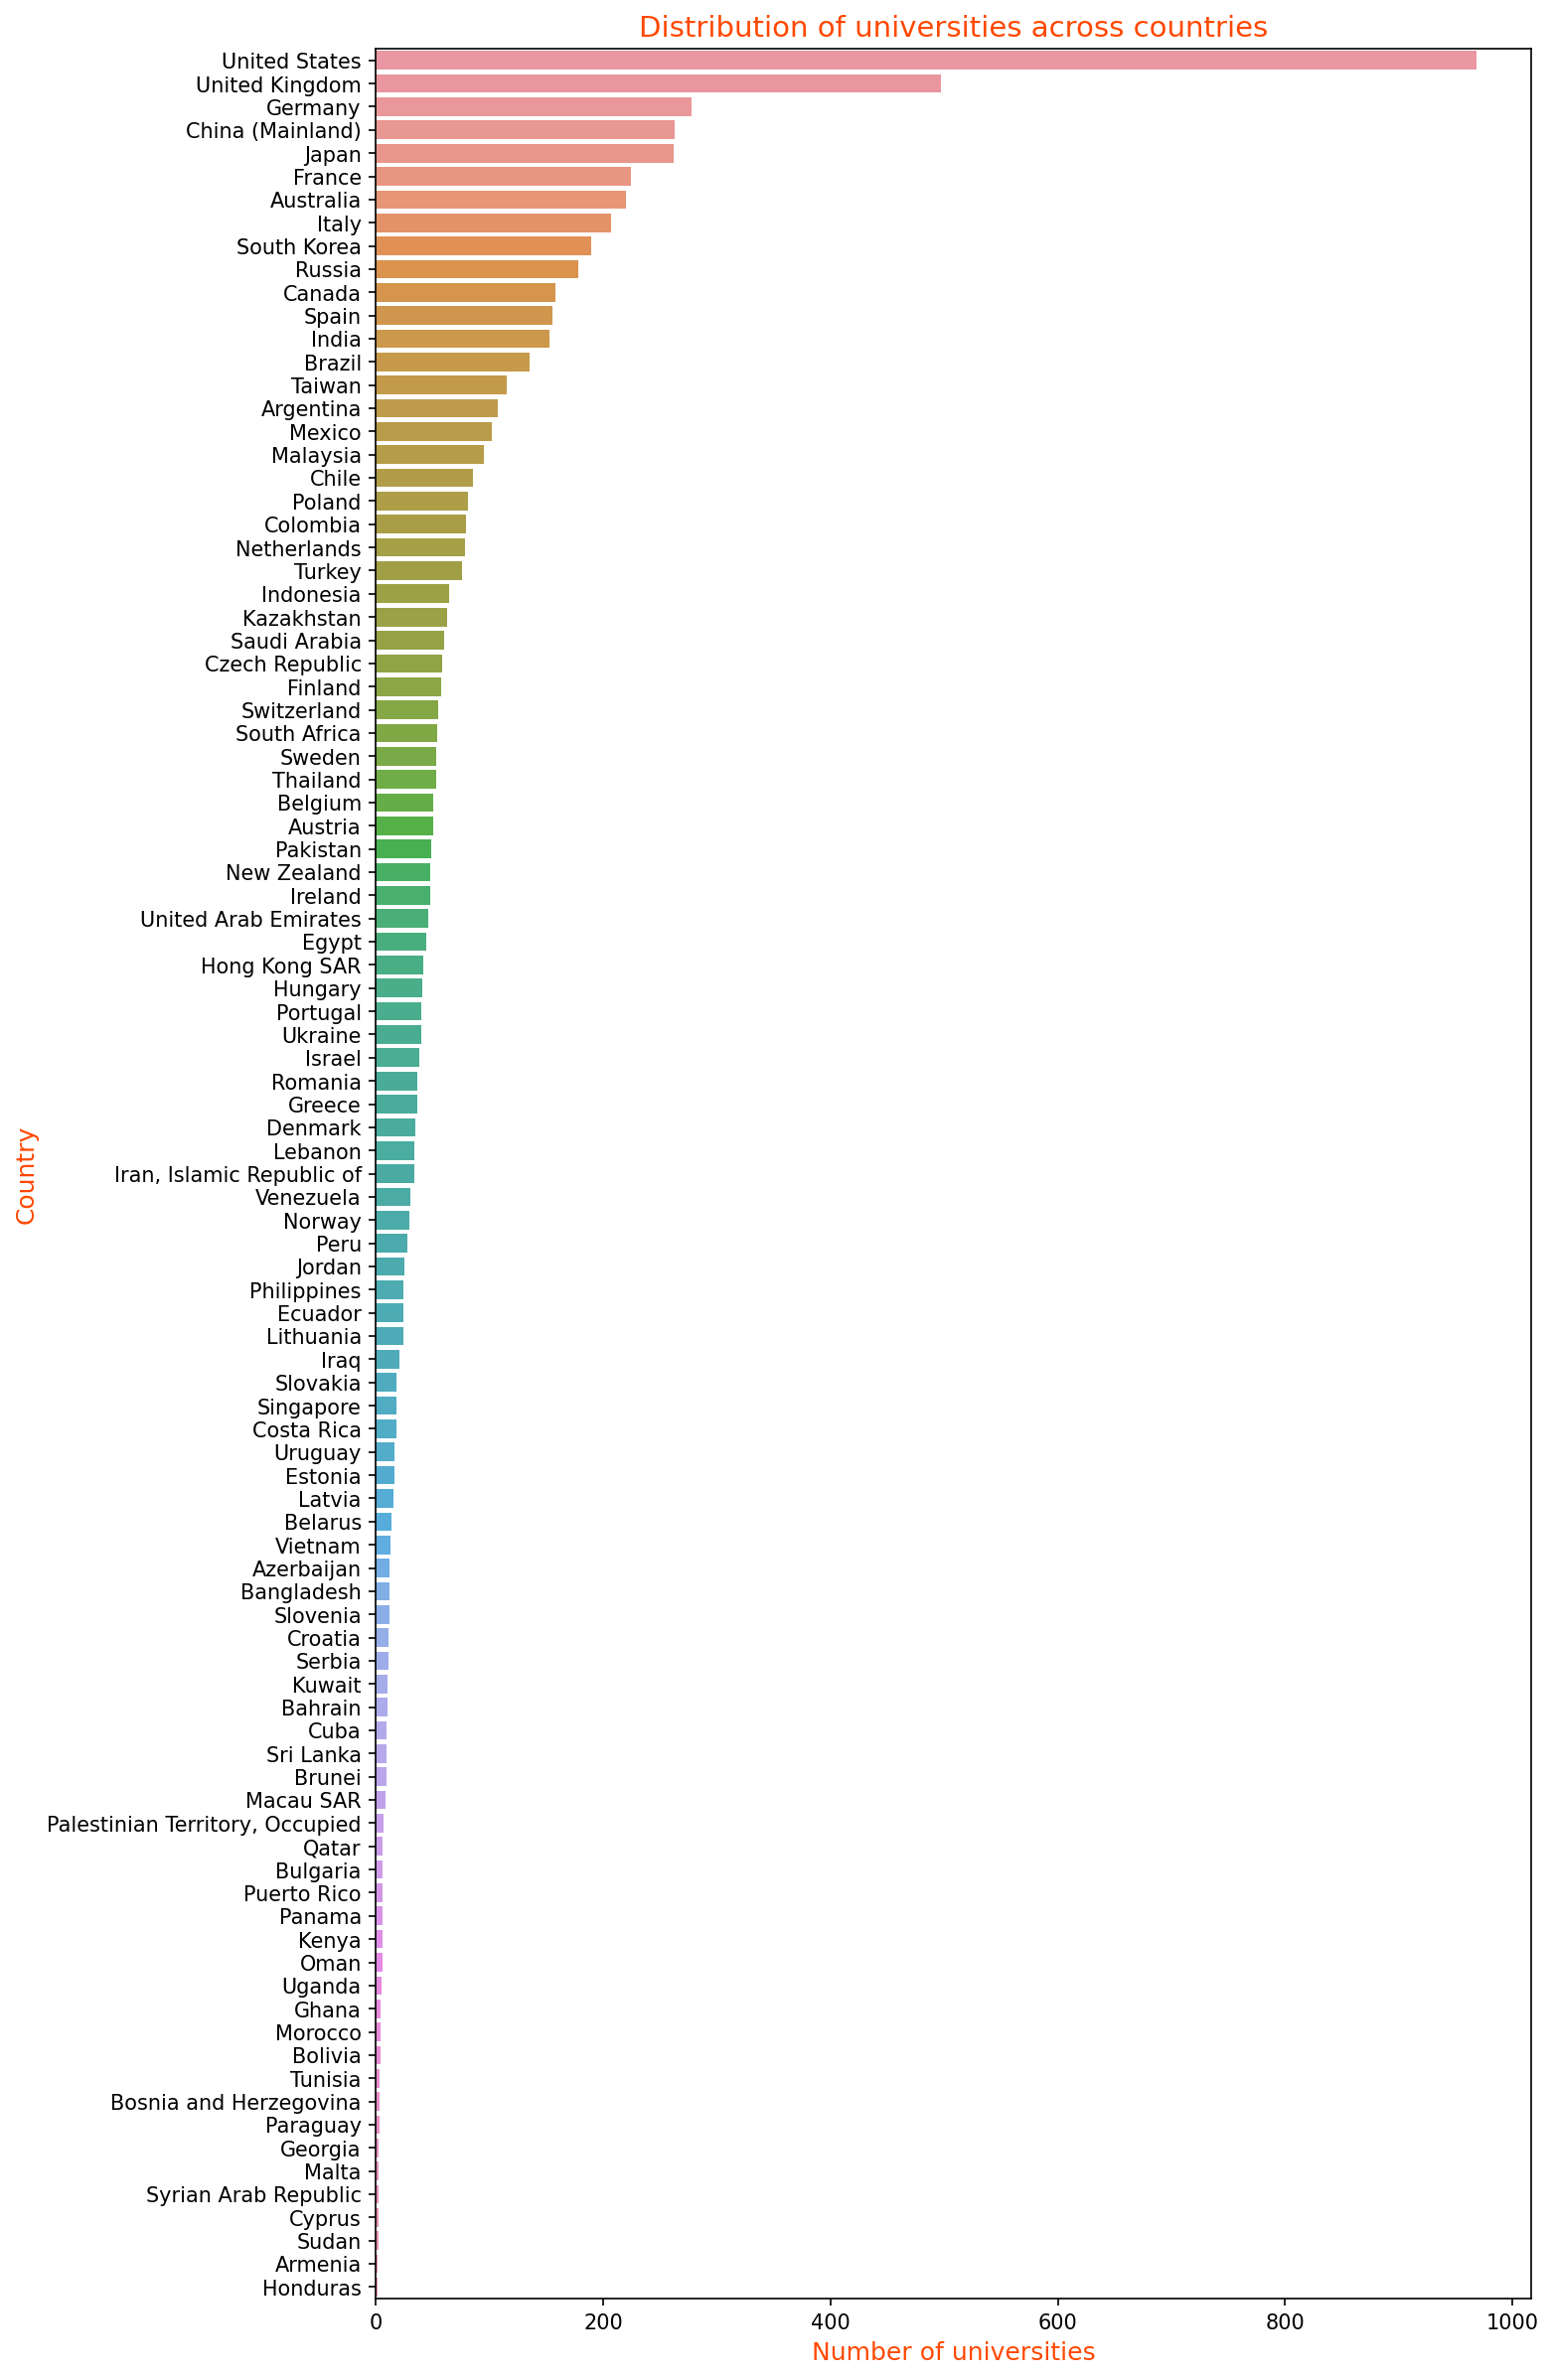

In [29]:
uni_df = df['university'].value_counts()

fig, ax = plt.subplots(figsize=(10,20), dpi = 150)\

sns.countplot(data = df, y='country', order = df.country.value_counts().index);

plt.xlabel('Number of universities', fontsize = 12, color = '#ff4800')
plt.ylabel('Country', fontsize =12, color ='#ff4800')
plt.title('Distribution of universities across countries', fontsize = 14, color = '#ff4800');

#plt.savefig('countrywise.png')

United States consists of maximum number of top universities followed by UK & Germany

### Universities by Cities

In [30]:
sorted_df = df.sort_values(by = 'rank_display').drop_duplicates('university')

sorted_df = pd.DataFrame(sorted_df['city'].value_counts()[:20])

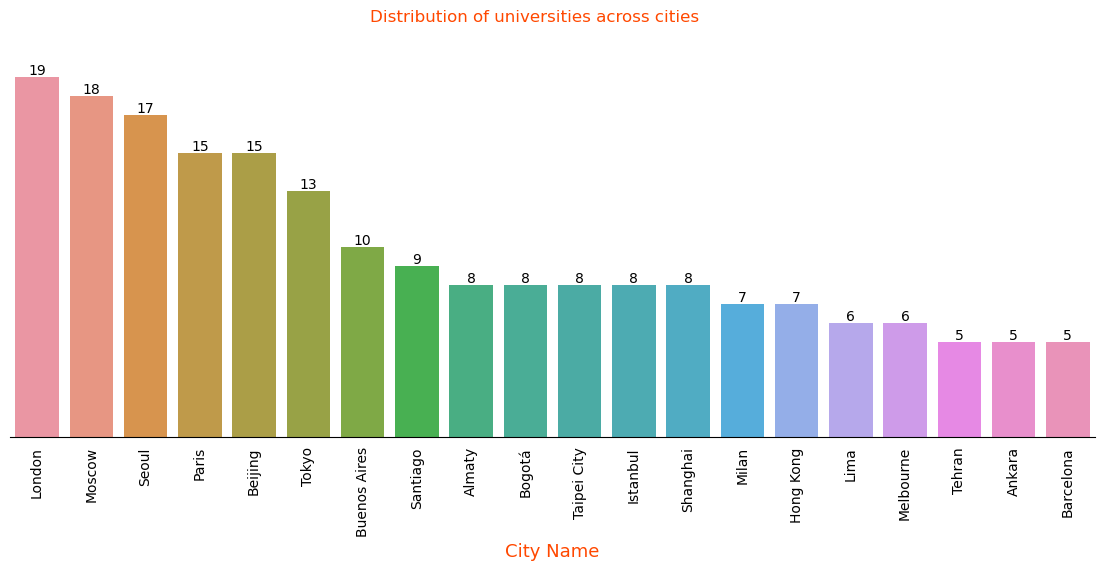

In [31]:
fig, ax = plt.subplots(figsize =(14,5), dpi = 100)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom = False)
ax.get_yaxis().set_visible(False)

sns.barplot(data = sorted_df, y='city', x=sorted_df.index)
plt.xticks(rotation=90);

ax.bar_label(ax.containers[0])

ax.set_xlabel('City Name', fontsize = 13, color = '#ff4800');

fig.suptitle('Distribution of universities across cities', fonTsize = 15, color = '#ff4800');

London has the maximum number of Universities followed by Moscow and Seoul

### Ranking Top 10 Universities

In [32]:
# university_df.sort_values('rank_display')[:60]

top_unis = ['Massachusetts Institute of Technology (MIT) ', 'Stanford University', 'University of Oxford', 'Harvard University', 'University of Cambridge', 'California Institute of Technology (Caltech)', 'ETH Zurich - Swiss Federal Institute of Technology', 'Imperial College London', 'UCL', 'University of Chicago']
topunis_df = df[df['university'].isin(top_unis)][['year','university','rank_display']].reset_index(drop=True)

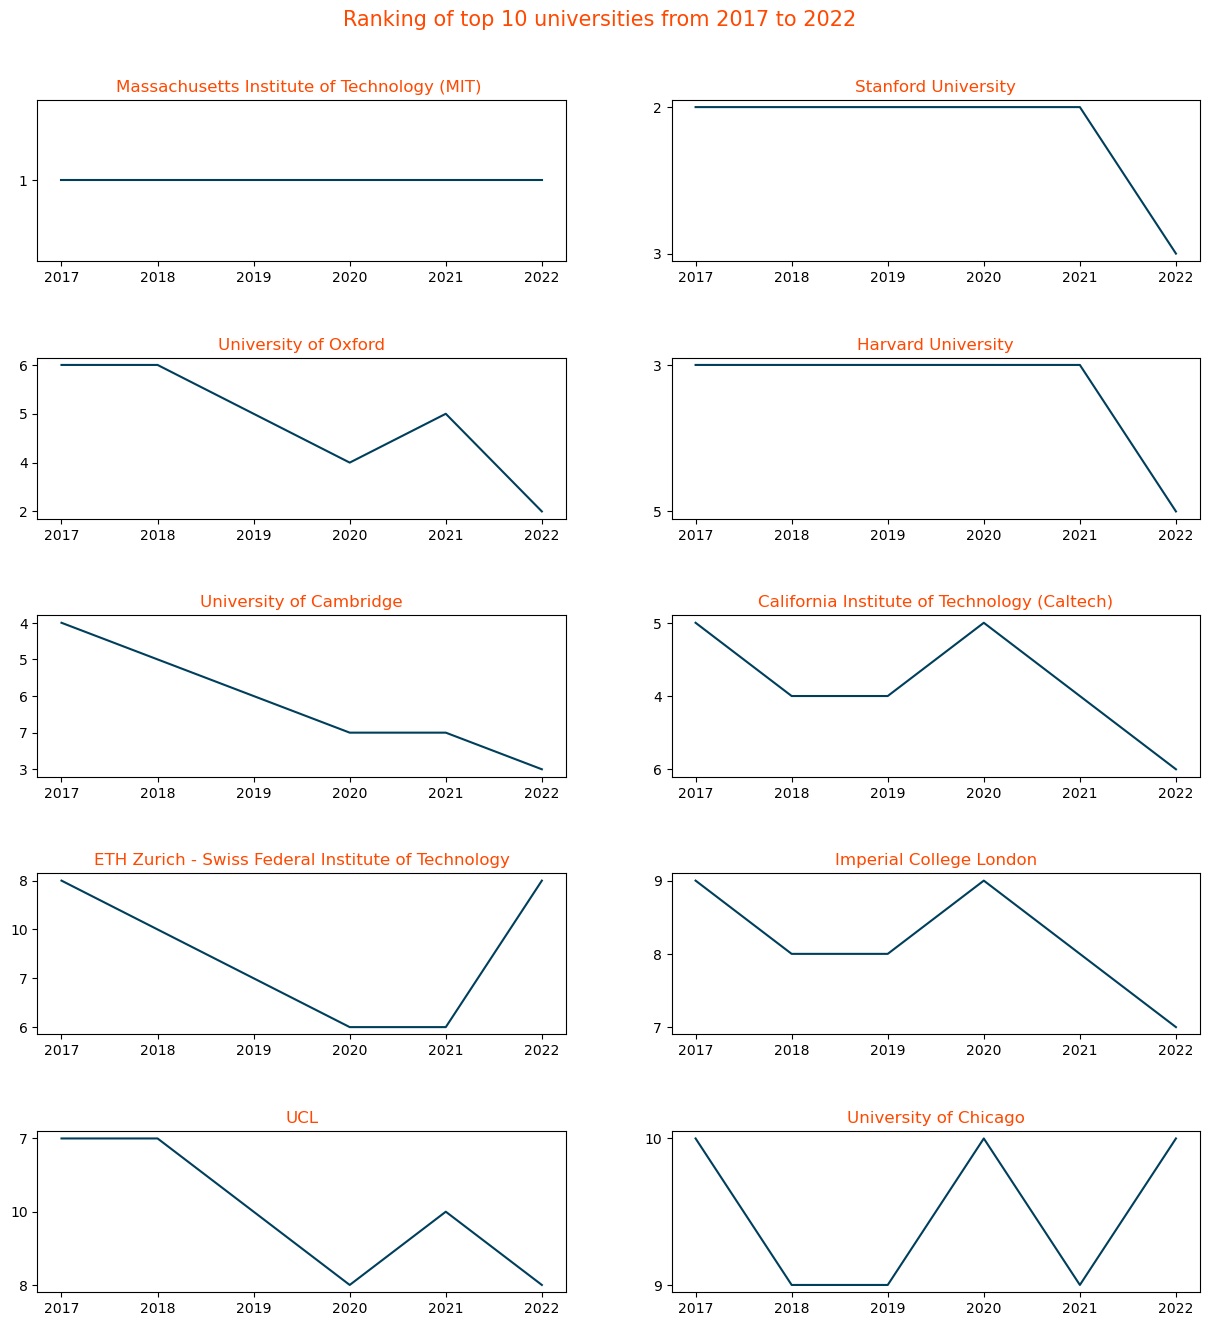

In [33]:
fig = plt.figure(figsize = (15,15), dpi = 100)

for uni, i in zip(top_unis, range (1, 11)):
    new_df = topunis_df[topunis_df['university'] == uni]
    ax = fig.add_subplot(5,2,i)
    ax.plot(new_df['year'], new_df['rank_display'], color = '#003f5c', linewidth = 1.5)
    plt.gca().invert_yaxis()
    ax.set_title(uni, color = '#ff4800')
    
    fig.subplots_adjust(wspace = 0.2, hspace =0.6, top=0.92)
    fig.suptitle('Ranking of top 10 universities from 2017 to 2022',
                fontsize =15, color ='#ff4800');

Ranking of MIT has been constant over the last 5 years, whereas certain top universities like Stanford and Harvard have seen a drop in their ranking, while Oxford & cambridge has improved its ranking to 2 & 3 respectively.
Among the Top 10 Ranking institutes, only ETH Zurich is from a country other than UK and US

## World Rankings - Contributing Factors

### Research_output

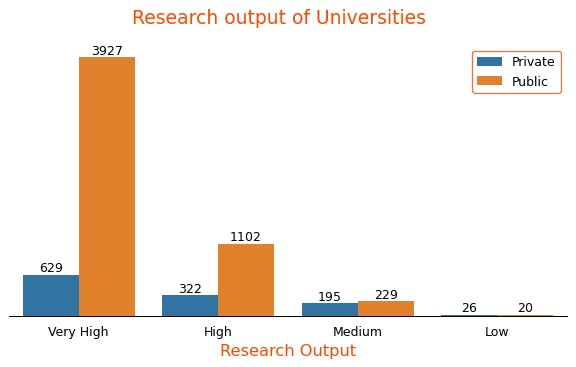

In [34]:
fig, ax = plt.subplots(figsize = (8,4), dpi = 90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(bottom = False)
ax.get_yaxis().set_visible(False)

sns.countplot(data = df, x = 'research_output', hue = 'type');

for container in ax.containers:
    ax.bar_label(container)
    
    
plt.legend(edgecolor = '#ff4800');
ax.set_xlabel('Research Output', fontsize = 13, color = '#ff4800');
fig.suptitle('Research output of Universities', fontsize = 15, color = '#ff4800');

Maximum research output are by the public universities

### Research output Vs Faculty Count

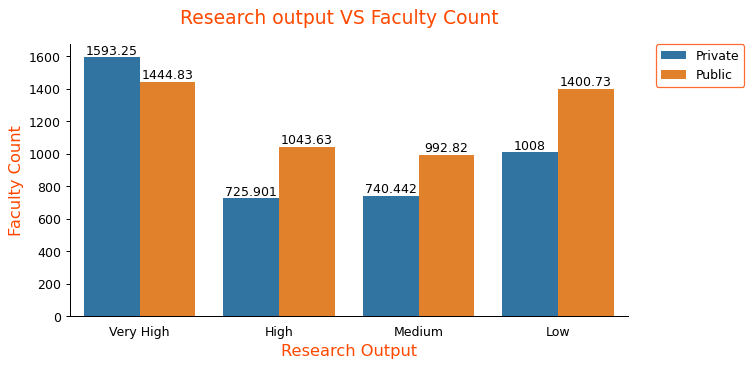

In [35]:
fig, ax= plt.subplots(figsize =(8,4), dpi = 90)

sns.barplot(data = df, x='research_output', y='faculty_count', hue = 'type', ci = None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom = False)
ax.set_xlabel('Research Output', fontsize =13, color = '#ff4800')
ax.set_ylabel('Faculty Count', fontsize = 13, color = '#ff4800')


for container in ax.containers:
    ax.bar_label(container)

ax.legend(edgecolor = '#ff4800', bbox_to_anchor = (1.05,1), loc=2, borderaxespad = 0)
fig.suptitle('Research output VS Faculty Count', fontsize = 15, color = '#ff4800');

Private universities have a more faculty count and high research output as compared to public ones.
But we can also see that public universities with low research output have a higher faculty count as compared to that of private universities

In [36]:
research_size = pd.DataFrame(df.groupby(['research_output']).apply(lambda df: df['size'].value_counts()))

In [37]:
research_size

size
research_output         
High            L    767
                XL   380
                M    204
                S     73
Low             M     20
                L     10
                S     10
                XL     6
Medium          L    197
                XL   106
                M     99
                S     22
Very High       L   2088
                XL  1139
                M   1066
                S    273

## Inerpret Pointplot

### Student Faculty Ratio

In [38]:
df['student_faculty_ratio'].describe()

count    6407.000000
mean       13.264554
std         6.604294
min         1.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        67.000000
Name: student_faculty_ratio, dtype: float64

Text(0.5, 1.0, 'Distribution of Student Faculty Ratio')

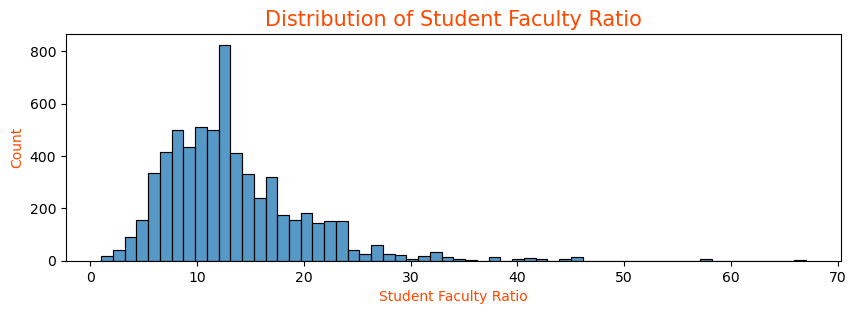

In [39]:
plt.figure(figsize=(10,3), dpi = 100)
sns.histplot(data= df, x= 'student_faculty_ratio', bins = 60);

plt.xlabel('Student Faculty Ratio', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of Student Faculty Ratio', fontsize = 15, color = '#ff4800')

Right skewed distribution. Maximum universities have a student faculty ratio in a range from 5 to 25

### Studnet Faculty Ratio VS Research Output

Text(0.5, 1.0, 'Student Faculty Ratio VS Research Output')

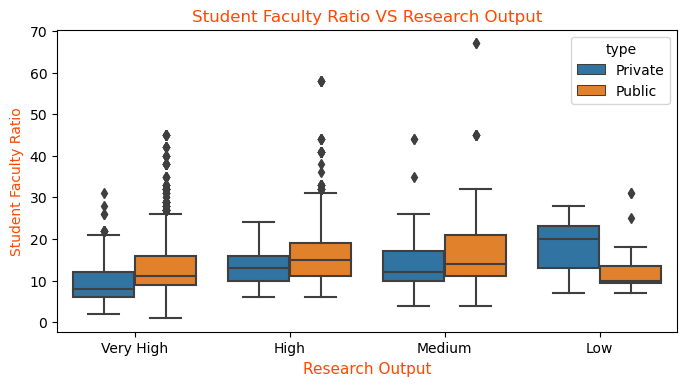

In [40]:
plt.figure(figsize=(8,4), dpi = 100)
sns.boxplot(data = df, y = 'student_faculty_ratio', x='research_output', hue = 'type')

plt.xlabel('Research Output', fontsize = 11, color = '#ff4800')
plt.ylabel('Student Faculty Ratio', color = '#ff4800')
plt.title('Student Faculty Ratio VS Research Output', color = '#ff4800')


Universities with "Very High" research output have very less "student faculty ratio" compared to the rest of them

### Student Faculty Ratio VS Size of University

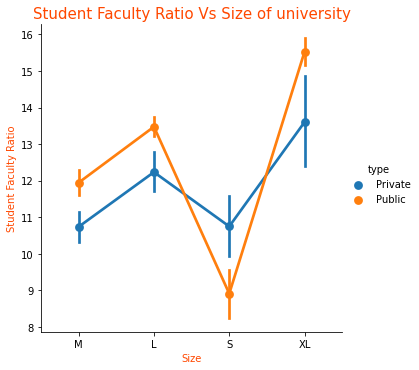

In [41]:
sns.catplot(kind="point", data=df, x="size", y="student_faculty_ratio", hue='type');
plt.xlabel('Size', color = '#ff4800')
plt.ylabel('Student Faculty Ratio', color = '#ff4800')
plt.title('Student Faculty Ratio Vs Size of university', fontsize=15, color = '#ff4800');

Public universities have a higher student faculty ratio, moreover this ratio seems to increase as the university size increases"

### International Students

In [42]:
df['international_students'] = df['international_students'].apply(lambda x: float(str(x).replace(',','')))
df['faculty_count'] = df['faculty_count'].apply(lambda x: float(str(x).replace(',','')))

In [43]:
df['international_students'].describe()

count     6318.000000
mean      1989.934535
std       3506.326287
min          1.000000
25%          4.024000
50%        473.000000
75%       2654.000000
max      31049.000000
Name: international_students, dtype: float64

In [44]:
# Checking which university has a maximum international student count of 31,049!
df.iloc[df['international_students'].idxmax()]

university                                                Monash University
year                                                                   2017
rank_display                                                             65
country                                                           Australia
city                                                              Melbourne
region                                                              Oceania
logo                      https://www.topuniversities.com/sites/default/...
type                                                                 Public
research_output                                                   Very High
student_faculty_ratio                                                  15.0
international_students                                              31049.0
size                                                                     XL
faculty_count                                                        3852.0
Name: 64, dt

Text(0.5, 1.0, 'Distribution of International students')

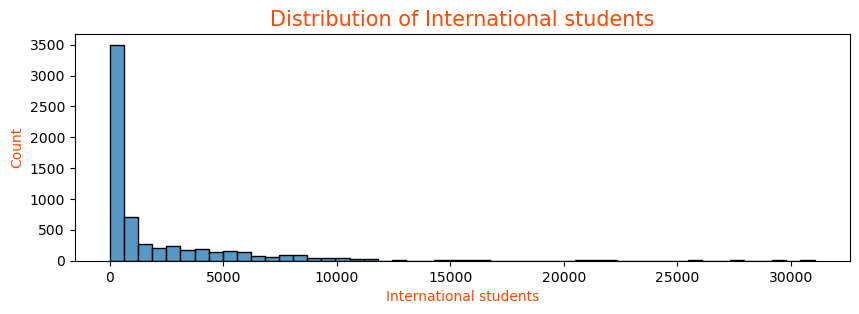

In [45]:
plt.figure(figsize=(10,3), dpi = 100)
sns.histplot(data = df, x='international_students', bins = 50);

plt.xlabel('International students', color = '#ff4800')
plt.ylabel('Count', color = '#ff4800')
plt.title('Distribution of International students', fontsize = 15, color ='#ff4800')

Right skewed distribution, with maximum international students ranging from 0-5,000

### International Students VS Research Output

Text(0.5, 1.0, 'International Students Vs Research Output')

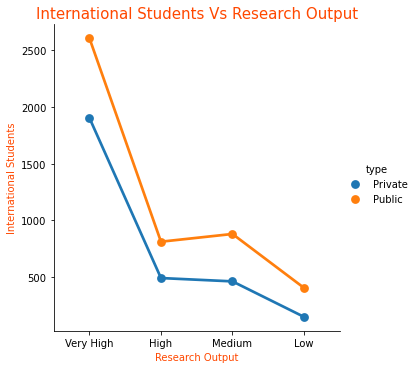

In [46]:
sns.catplot (kind = 'point', data = df, x='research_output', y = 'international_students', 
             order = df['research_output'].value_counts().index, ci = None, hue = 'type');

plt.xlabel('Research Output', color = '#ff4800')
plt.ylabel('International Students', color = '#ff4800')
plt.title('International Students Vs Research Output', fontsize = 15, color = '#ff4800')

International Student prefer Public universities as compared to Private universities 

### Most popular country of choice for International Students

In [47]:
df_country = pd.DataFrame(df.groupby(['country'], sort = False)['international_students'].sum().sort_values(ascending = False)[:10])

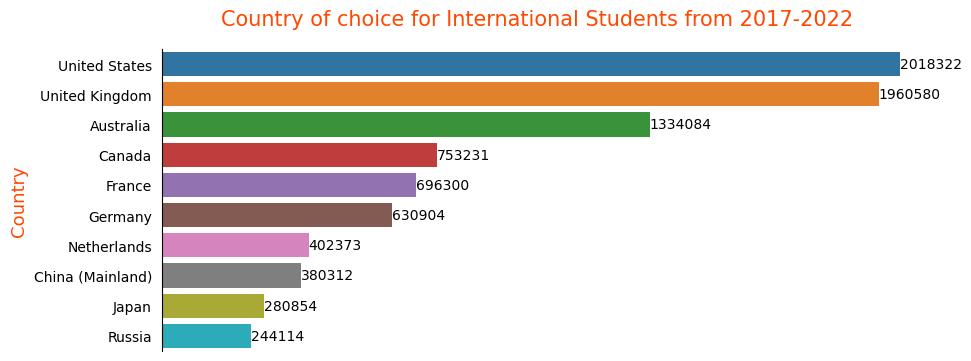

In [48]:
fig, ax = plt.subplots(figsize = (10,4), dpi = 100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left = False)
ax.get_xaxis().set_visible(False)

sns.barplot(data = df_country, x='international_students', y = df_country.index);

ax.bar_label(ax.containers[0], fmt = '%d')

ax.set_ylabel('Country', fontsize = 13, color = '#ff4800');

fig.suptitle('Country of choice for International Students from 2017-2022', fontsize = 15, color = '#ff4800');

USA is most preferred destination closely followed by UK

In [49]:
# Exporting csv
df_path = r'C:\Users\iNDIA\Desktop\Kaggle\QS World University Rankings 2017 - 2022'

In [50]:
df.to_csv(os.path.join(df_path, 'World University Ranking.csv'))

## The End